# Clusterização para o problema de Drug Consumption

No mundo inteiro, o consumo de drogas é um dos principais problemas de saúde pública. O uso da maior parte das drogas provoca, em um primeiro momento, efeitos muito positivos como sensação de bem-estar, felicidade e coragem. No entanto, seus efeitos a longo prazo podem ser muito graves, especialmente quando utilizadas por muito tempo.

O uso de drogas pode provocar alterações sérias no funcionamento do coração, do fígado, pulmões e até mesmo do cérebro, sendo muito prejudicial à saúde e podendo levar à morte.

Além disso, uma boa parte das drogas causa vício e, por isso, o corpo vai precisando de uma dose cada vez superior para conseguir obter os mesmos resultados positivos, o que aumenta muito o risco de morte por overdose.

Existem inúmeros algoritmos de clusterização. No presente trabalho vamos trabalhar com dois dos mais populares: **K-Means** e o **EM - Gaussian Mixture**.

## Base de dados

A base de dados a ser utilizada no trabalho foi baixada por meio do link <http://archive.ics.uci.edu/ml/datasets/Drug+consumption%28quantified%29>, O Banco de dados contém registros para 1885 respondentes e atributos como medições de personalidade, escolaridade, idade, sexo, país de residência e etnia. Todos os atributos de entrada são originalmente categóricos e são quantificados. Além disso, os participantes foram questionados sobre o uso de 18 drogas legais e ilegais e para cada uma delas eles tiveram que selecionar uma das respostas: nunca usaram a droga, a usaram mais de uma década atrás, ou na última década, ano, mês, semana ou dia.

## Bibliotecas usadas

### Instalação

In [21]:
import sys
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install graphviz


### Importação

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from scipy.stats.mstats import zscore
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus    
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline 

In [23]:
col_names = ["id","idade","sexo","escolaridade","pais","etnia","nscore","escore","oscore","ascore","cscore","impulsividade","ss","alcool","anfetamina","nitrato_amilato","benzodiazepina","cafeina","maconha","chocolate","cocaina","crack","ecstase","heroina","ketamina","legalidade","lsd","metadona","cogumelos","nicotina","semeron","vsa"]

df= pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", names=col_names, index_col = 0)

df.head()

,idade,sexo,escolaridade,pais,etnia,nscore,escore,oscore,ascore,cscore,...,ecstase,heroina,ketamina,legalidade,lsd,metadona,cogumelos,nicotina,semeron,vsa
id,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Análise de Missings

In [24]:
df.isnull().apply(sum, axis=0).sum()

0

## Pré-processamento

Para servir como input para os algoritmos de agrupamento, a base de dados precisou passar por alguns tratamentos. De forma geral, a base de dados é bem consistente, não possui dados faltantes e a maioria das variáveis são numéricas. 

### Codificação das features

Apenas um conjunto de features estava como string na base de dados e foi aplicada uma codificação, para transformá-las em categóricas ordinais, pois possuem uma ordenação lógica.

In [25]:
cols_subs = ["alcool", "anfetamina", "nitrato_amilato", "benzodiazepina", "cafeina", "maconha", "chocolate", "cocaina", "crack", "ecstase", "heroina", "ketamina", "legalidade", "lsd", "metadona", "cogumelos", "nicotina", "semeron", "vsa"]
vals_dict = {"CL"+str(i): i for i in range(7)}

def substituir(data):
    return vals_dict[data]

for col in cols_subs:
    df[col] = df[col].apply(substituir)
    df[col] = zscore(df[col])

df.head(5)

,idade,sexo,escolaridade,pais,etnia,nscore,escore,oscore,ascore,cscore,...,ecstase,heroina,ketamina,legalidade,lsd,metadona,cogumelos,nicotina,semeron,vsa
id,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,-0.797786,-0.361531,-0.466701,-0.757874,-0.712104,-0.502082,-0.809895,-0.497466,-0.059948,-0.450487
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1.630679,-0.361531,1.173058,-0.757874,0.629541,1.320302,-0.809895,0.331278,-0.059948,-0.450487
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,-0.797786,-0.361531,-0.466701,-0.757874,-0.712104,-0.502082,-0.127745,-1.326209,-0.059948,-0.450487
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,-0.797786,-0.361531,1.173058,-0.757874,-0.712104,-0.502082,-0.809895,-0.497466,-0.059948,-0.450487
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,-0.190670,-0.361531,-0.466701,-0.198957,-0.712104,-0.502082,0.554406,-0.497466,-0.059948,-0.450487


### Remoção de colunas

As colunas relacionadas a país e etnia foram removidas.

In [26]:
cols_del = ["pais", "etnia"]
df.drop(cols_del, axis=1, inplace=True)
df.head(5)

,idade,sexo,escolaridade,nscore,escore,oscore,ascore,cscore,impulsividade,ss,...,ecstase,heroina,ketamina,legalidade,lsd,metadona,cogumelos,nicotina,semeron,vsa
id,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,...,-0.797786,-0.361531,-0.466701,-0.757874,-0.712104,-0.502082,-0.809895,-0.497466,-0.059948,-0.450487
2,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,...,1.630679,-0.361531,1.173058,-0.757874,0.629541,1.320302,-0.809895,0.331278,-0.059948,-0.450487
3,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,...,-0.797786,-0.361531,-0.466701,-0.757874,-0.712104,-0.502082,-0.127745,-1.326209,-0.059948,-0.450487
4,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,...,-0.797786,-0.361531,1.173058,-0.757874,-0.712104,-0.502082,-0.809895,-0.497466,-0.059948,-0.450487
5,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,...,-0.190670,-0.361531,-0.466701,-0.198957,-0.712104,-0.502082,0.554406,-0.497466,-0.059948,-0.450487


In [27]:
X = df.values

# Escolha do número ótimo de grupos (k)

Ambos os algoritmos escolhidos precisam receber como parâmetro a quantidade de cluster, que deve ser definida previamente. Um processo muito usado para definir o número ótimo de grupos é o Elbow Method, que consiste em executar o algoritmo K-means para vários números de clusters, armazenar a medida WSS, plotar o gráfico com o WSS para cada quantidade de grupos e identificar o ponto que minimiza o WSS para o número menor de grupos, formando um cotovelo (Elbow).

A medida WSS é a soma dos quadrados da diferença entre os pontos e seus respectivos centróides, também chamado de inércia.

In [28]:
wss = []
s_gmm = []
s_kmeans = []
ch_gmm = []
ch_kmeans = []

K = range(2,20)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(X)
    kmeans.fit(X)
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(X)
    
    labels_kmeans = kmeans.predict(X)
    labels_gmm = gmm.predict(X)
    
    # Quanto maior, melhor -> entre -1 e 1
    s_kmeans.append(metrics.silhouette_score(X, labels_kmeans, metric='euclidean'))
    s_gmm.append(metrics.silhouette_score(X, labels_gmm, metric='euclidean'))
    
    ch_kmeans.append(metrics.calinski_harabaz_score(X, labels_kmeans))
    ch_gmm.append(metrics.calinski_harabaz_score(X, labels_gmm))
        
    wss.append(kmeans.inertia_)

Para escolher a quantidade de clusters ótima para ser usada como parâmetro para os algoritmos, utilizamos um conjunto de 20 valores e analisamos a medida WSS gerada por cada um destes valores. O figura a seguir mostra os valores de WSS obtidos para os diferentes números de clusters. Analisando a figura Elbow são encontrados dois valores que minimizam o WSS (3 e 7).

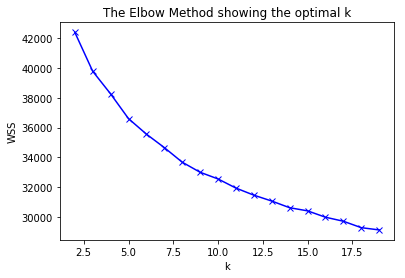

In [29]:
plt.plot(K, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Medidas de Qualidade do Agrupamento

Para mensurar a qualidade dos agrupamentos vamos usar as medidas Silhouette Coefficient e Calinski-Harabaz Index. Para auxiliar na escolha do melhor valor foram analisadas as métricas Calinski-Harabaz Index e Silhouette Coefficient. Os gráticos abaixo apresentam os resultados obtidos por cada métrica em cada algoritmo.

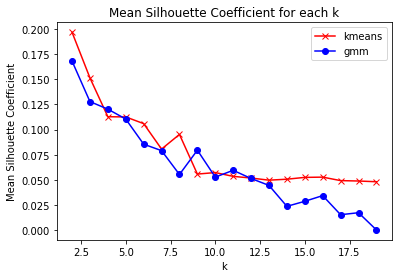

In [30]:
plt.plot(K, s_kmeans, 'xr-') # plotting t, a separately 
plt.plot(K, s_gmm, 'ob-')
plt.legend(["kmeans", "gmm"])
plt.xlabel('k')
plt.ylabel('Mean Silhouette Coefficient')
plt.title('Mean Silhouette Coefficient for each k')
plt.show()


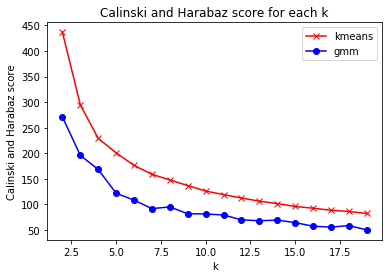

In [31]:
plt.plot(K, ch_kmeans, 'xr-') # plotting t, a separately 
plt.plot(K, ch_gmm, 'ob-')
plt.legend(["kmeans", "gmm"])
plt.xlabel('k')
plt.ylabel('Calinski and Harabaz score')
plt.title('Calinski and Harabaz score for each k')
plt.show()

Após analisar as figuras, foi escolhido a quantidade de 3 (**três**) clusters para o algoritmo K-means, pois, esta quantidade fornece clusters mais densos e mais separados.

## Resultado dos Algoritmos para  Clusterização com 3 grupos

Analisando os gráficos abaixo concluimos que para um *k* igual a 3, o algoritmo k-means apresenta resultados melhores em relação ao algortimo GMM, já que possui grupos mais homogêneos internamente e bem delimitados.

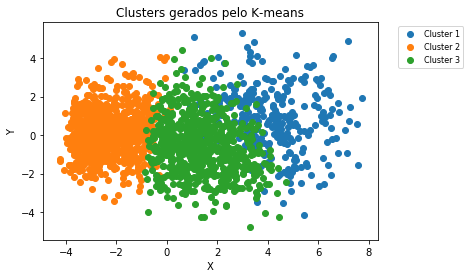

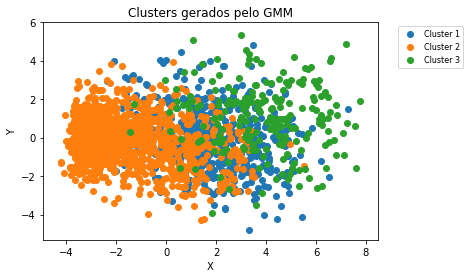

In [32]:
def plotar_cluster(df_res_algoritmo, nome_algoritmo = "K-means"):
    # verifica quantos clusters tem 
    qtde_cluster = df_res_algoritmo.Cluster.max()+1
    plots = []
    for cluster in range(qtde_cluster):
        p = plt.scatter(df_res_algoritmo[df_res_algoritmo['Cluster'] == cluster].PC1, 
                        df_res_algoritmo[df_res_algoritmo['Cluster'] == cluster].PC2)
        plots.append(p)

    plt.legend(tuple(plots),
           (tuple(["Cluster {}".format(c) for c in range(1, qtde_cluster+1)])), 
           loc=2, fontsize=8, bbox_to_anchor=(1.05, 1))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Clusters gerados pelo "+nome_algoritmo)
    plt.show()
    
    
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

labels_kmeans = kmeans.predict(X)
labels_gmm = gmm.predict(X)

#  Reduz a dimensionalidade do problema para plotar
pca = PCA(n_components=2)
pca.fit(X)
pca_X = pca.transform(X)

df_res_kmeans = pd.DataFrame({'PC1': pca_X[:,0], 'PC2': pca_X[:,1], 'Cluster': labels_kmeans})
df_res_gmm = pd.DataFrame({'PC1': pca_X[:,0], 'PC2': pca_X[:,1], 'Cluster': labels_gmm})


plotar_cluster(df_res_kmeans, "K-means")
plotar_cluster(df_res_gmm, "GMM")

## Interpretando os cluster obtidos

### Análise das principais features

A figura abaixo apresenta a importância das features para a classificação das observações em cada cluster segundo a *Árvore de Decisão*. Ela mostra as características mais influentes no processo de classificação, sendo o consumo de cogumelos e maconha as características mais importantes e o uso de cafeína e o sexo do indivíduo as menos relevantes

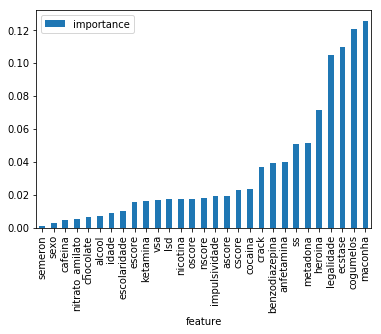

In [33]:
model = RandomForestClassifier(n_estimators=10, random_state=42)

model.fit(X, list(df_res_kmeans.Cluster))

df_importance = pd.DataFrame({"feature": list(df.columns), "importance": model.feature_importances_})

df_importance = df_importance.sort_values('importance')

df_importance.plot.bar('feature')

Filtrando as features mais importantes

In [34]:
df_importance = df_importance.sort_values('importance')
features_importantes = list(df_importance.tail(10).feature)

Os dados serão recarregados novamente para o ficar mais fácil de interpretá-los sem normalizá-los

In [35]:
df_original = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", names=col_names, index_col = 0)
df_original.drop("pais", axis=1, inplace=True)#apagar país
df_original.drop("etnia", axis=1, inplace=True)#apagar etnia

df_original.head(4)

,idade,sexo,escolaridade,nscore,escore,oscore,ascore,cscore,impulsividade,ss,...,ecstase,heroina,ketamina,legalidade,lsd,metadona,cogumelos,nicotina,semeron,vsa
id,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0


In [36]:
for col in cols_subs:
    df_original[col] = df_original[col].apply(substituir)
    
X_original = df_original.values

#### Árvore de decisão usada para interpretar os clusters

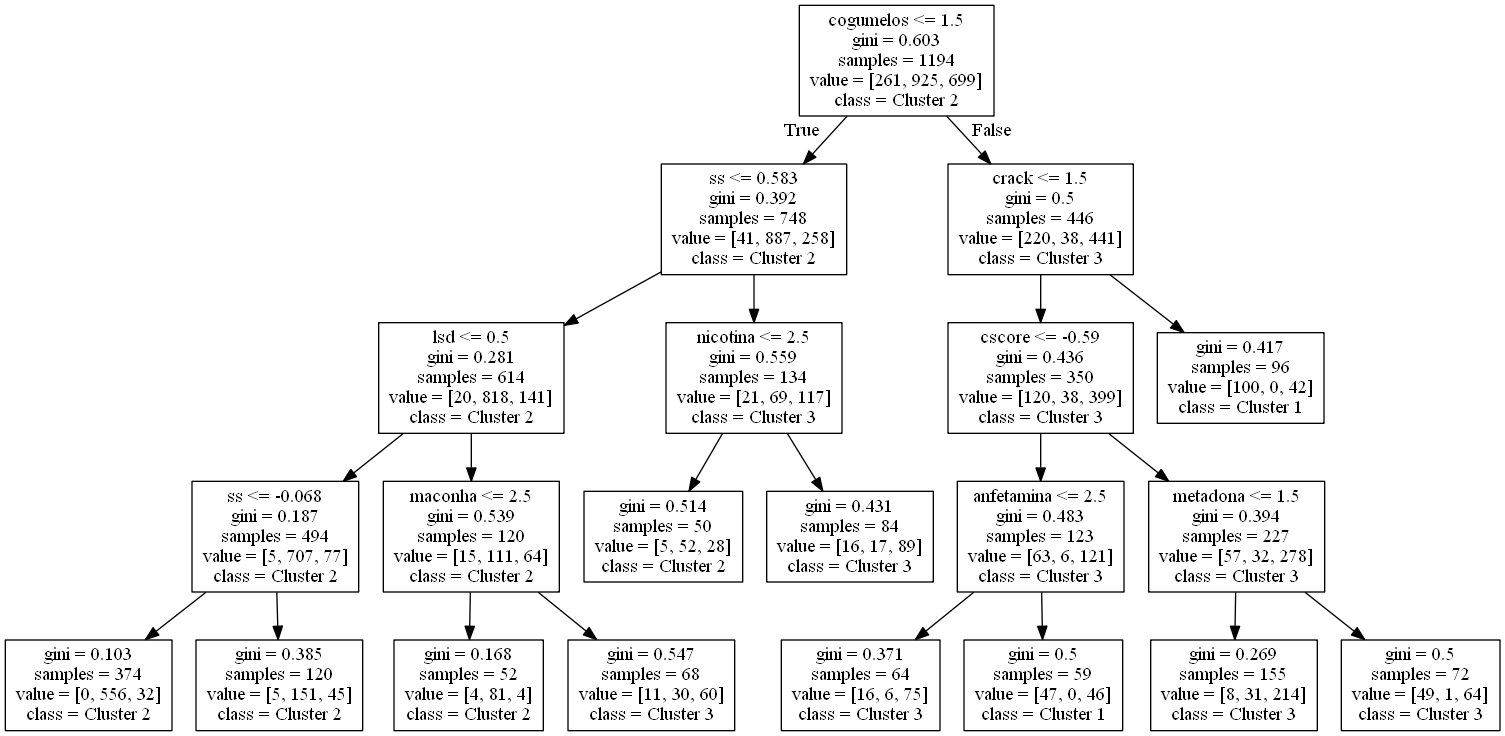

In [37]:
model_original = RandomForestClassifier(n_estimators=10, max_depth=4, min_samples_leaf = 50, random_state=42)

model_original.fit(X_original, list(df_res_kmeans.Cluster))
dot_data = export_graphviz(model_original.estimators_[5], out_file=None, 
                                feature_names=list(df_original.columns),  
                                class_names=['Cluster 1', 'Cluster 2', 'Cluster 3'])

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

A árvore de decisão apresentada pela figura acima mostra quais conjuntos de características são utilizadas para definir em qual cluster cada elemento será agrupado. Nela é possível identificar que as características dos componentes do Cluster 1 (azul) são pessoas que tiveram um contato há mais de uma década com cogumelos, nunca usou heroína ou pode ter tido contato com maconha na última década. 

O Cluster 2 (amarelo) é composto por usuários que usaram cogumelos há mais de uma década, usaram maconha pelo menos no ano passado e usaram ecstase ao menos na última década. Um outro perfil de usuários do Cluster dois é de pessoas que usaram cogumelo pelos nos últimos 10 anos, se fizeram uso de cocaína foi na última década e podem ser usuários assíduos de maconha.

Por último, o Cluster 3 (vermelho) é composto por usuários que usaram cogumelos e crack na última década, cocaína no ano passado e podem já ter feito uso de heroína. 

De forma geral, podemos ver que o Cluster 1 contempla usuários mais conservadores em relação ao consumo de drogas. Já o Cluster 2 contém pessoas que podem ter experimentado drogas um pouco mais pesadas, podem ser usuárias assíduas de maconha. O Cluster 3 possui os usuários de drogas mais pesadas como crack, cocaína e, eventualmente, heroína.

### Percentual de indivíduos em cada cluster

In [38]:
def percentual(resultado, cluster):
    return (resultado[resultado.Cluster == cluster].shape[0]/resultado.shape[0])*100


for cluster in range(3):
    print("Percentual de indivíduos no Cluster {c}: {perc}%".\
         format(c = cluster, perc = round(percentual(df_res_kmeans, cluster))))

Percentual de indivíduos no Cluster 0: 15%
Percentual de indivíduos no Cluster 1: 48%
Percentual de indivíduos no Cluster 2: 37%


## Conclusões

O trabalho apresentou uma comparação entre dois algoritmos de clusterização, o algoritmo K-means e o GMM. A partir de análises realizadas foi escolhido o K-means devido à qualidade da solução gerada. Ele foi capaz de gerar para o conjunto de dados analisados, clusters mais densos e mais separados. Foi utilizada uma árvore de decisão para analisar as características predominantes nos componentes de cada agrupamento e quais características (features) possuem uma importância maior no processos de construção dos clusters.